In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
from pathlib import Path 
import os

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["font.size"] = 16
seed=42

In [2]:
path = Path('plots')
if not path: path.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.read_csv('./data/train.csv')

In [4]:
df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


## Null value analysis

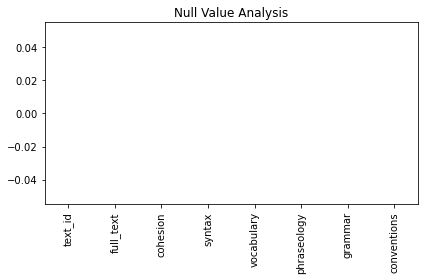

In [5]:
fig, ax = plt.subplots()
df.isna().sum().plot(kind='bar', grid=False, ax=ax)
ax.set_title("Null Value Analysis")
fig.tight_layout()
fig.savefig(path/'nulls.jpg')

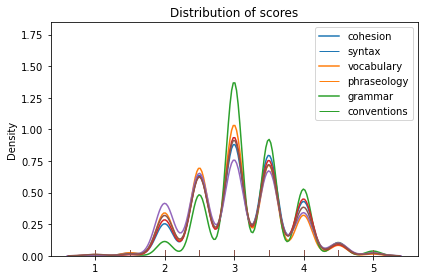

In [6]:
for col in df.columns[2:]:
  sns.distplot(df[[col]], hist=False, rug=True)

plt.legend(labels=df.columns[2:]);
plt.title('Distribution of scores')
plt.tight_layout()
plt.savefig(path/'scores_dist.jpg')

# Changing the distribution

In [11]:
df.iloc[:, 2:].mean(axis=0)

cohesion       2.338168
syntax         2.262522
vocabulary     2.419810
phraseology    2.329909
grammar        2.266812
conventions    2.301943
dtype: float64

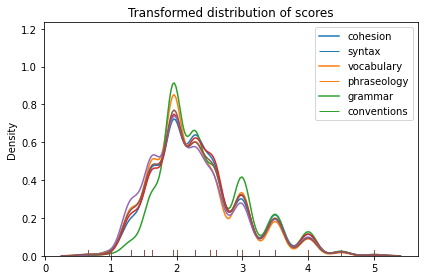

In [7]:
df.iloc[100:-1000, 2:] = df.iloc[100:-1000, 2:] * 0.65

for col in df.columns[2:]:
  sns.distplot(df[[col]], hist=False, rug=True)

plt.legend(labels=df.columns[2:])
plt.title('Transformed distribution of scores')
plt.tight_layout()
plt.savefig(path/'scores_dist_transformed.jpg')


## Character Length Analysis

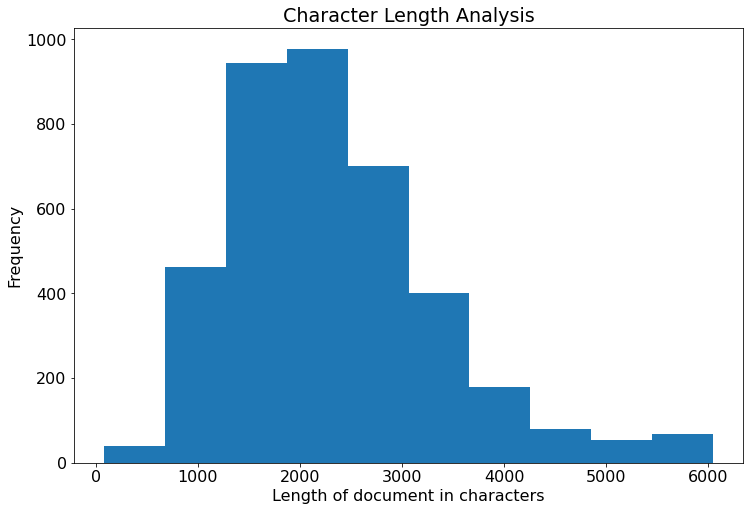

In [13]:
fig, ax = plt.subplots()
df.full_text.str.len().hist(ax=ax, grid=False)
ax.set_xlabel('Length of document in characters')
ax.set_ylabel('Frequency')
ax.set_title('Character Length Analysis')
fig.savefig(path/'charlen.jpg')


## Word Length Analysis

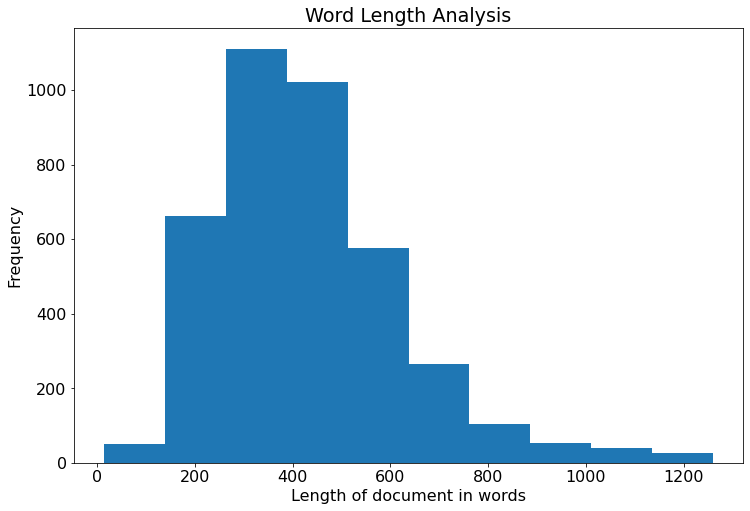

In [14]:
fig, ax = plt.subplots()
df.full_text.str.split().map(lambda x: len(x)).hist(ax=ax, grid=False)
ax.set_xlabel('Length of document in words')
ax.set_ylabel('Frequency')
ax.set_title('Word Length Analysis')
fig.savefig(path/'wordlen.jpg')


## Average word length

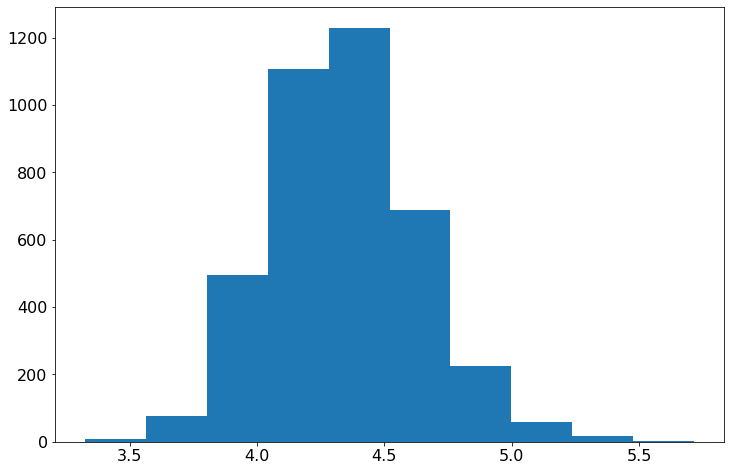

In [15]:
df.full_text.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist(grid=False)
fig.savefig(path/'wordlen.jpg')


## Text complexity

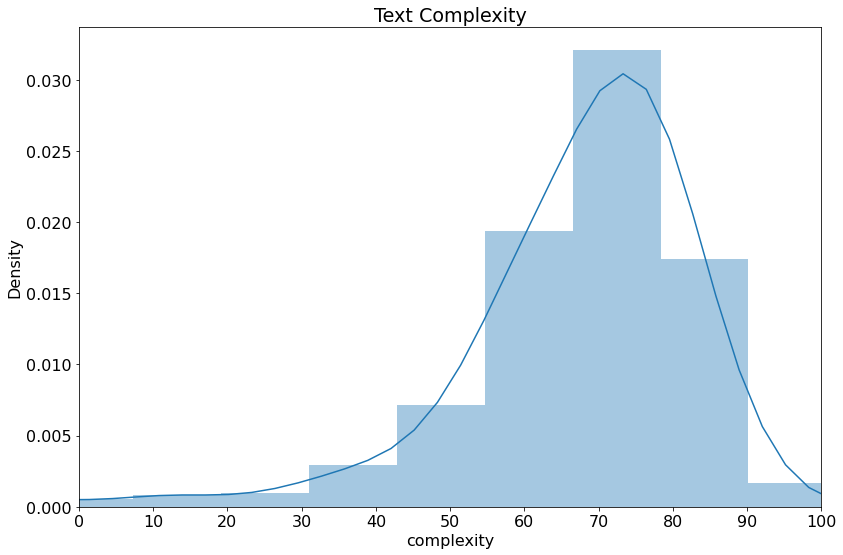

In [30]:
from textstat import flesch_reading_ease
from IPython.display import clear_output

clear_output()

df['complexity'] = df['full_text'].apply(
    lambda x: flesch_reading_ease(x))
fig, ax = plt.subplots()
sns.distplot(df['complexity'], ax=ax);
plt.title('Text Complexity');
plt.xlim((0, 100))
plt.xticks(range(0, 101, 10))
plt.tight_layout()
plt.savefig(path/'textcomplexity.jpg')


In [31]:
!pip install textblob

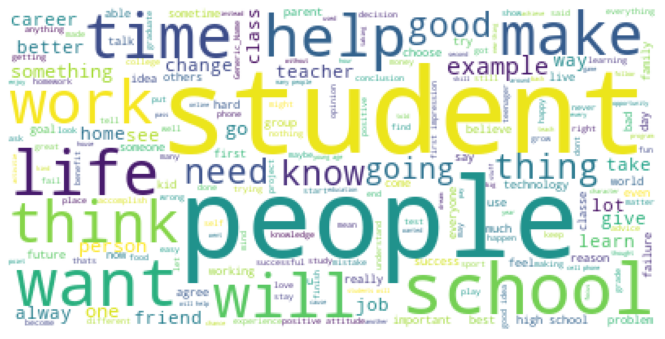

In [32]:
from wordcloud import WordCloud

corpus = ''.join(df['full_text'])
wordcloud = WordCloud(background_color='white').generate(corpus)
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.savefig(path/'wordcloud.jpg')
plt.show()

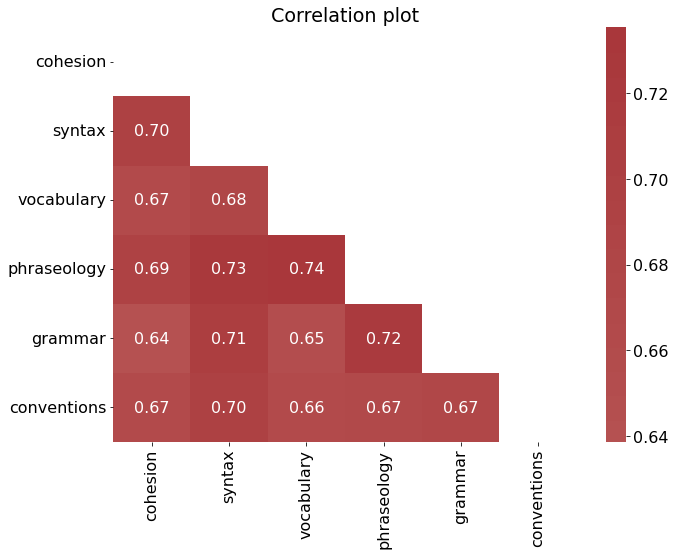

In [16]:
corr = df.select_dtypes(['int', 'float']).corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# Heatmap without absolute values
sns.heatmap(corr, mask=matrix, center=0, cmap='vlag', ax=axes,
            annot=True, fmt='.2f').set_title('Correlation plot')

fig.tight_layout(h_pad=1.0, w_pad=0.5)
fig.savefig(path/'correlation.jpg')
